# Predicting percentage of marks Vs hours of study

**Objective**
- To predict the percentage of marks that a student is expected to score if the student studies 9.25 hours per day.

## Importing neccesary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Loading Dataset

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Visualization

### Lets check the relation between both the variables

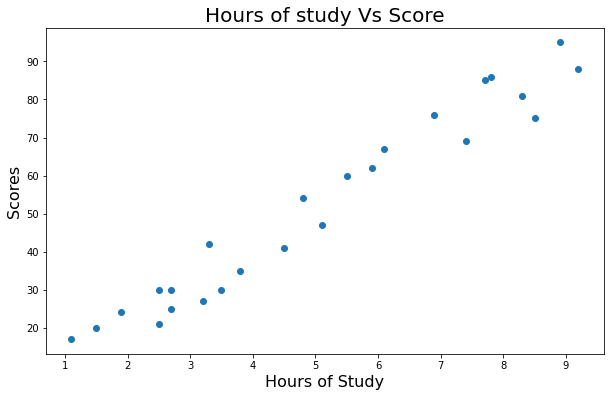

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours'],df['Scores'])
plt.ylabel('Scores', fontsize=16)
plt.xlabel('Hours of Study', fontsize=16)
plt.title('Hours of study Vs Score', fontsize=20)
plt.show()

**From the above graph we can see that there is a positive relation between Hours of studies and the percentage of marks obtained. Hence as the number of hour increases; the percentage of score also increases.**

### Distribution of each layer

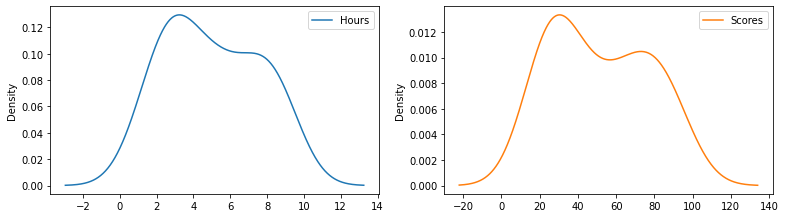

In [6]:
df.plot(kind='density', subplots=True, layout=(5, 3), sharex=False, sharey=False, figsize = (20,20))
plt.show()

## Splitting data into X & y

In [7]:
df.shape

(25, 2)

In [8]:
X = df.drop('Scores', 1)
y = df.Scores

## Splitting into train and test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model Building

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

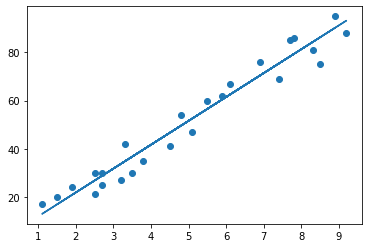

In [11]:
# Plotting the regression line
line = lr.coef_*X + lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Prediction

In [12]:
y_pred = lr.predict(X_test)

In [13]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### Testing Model

In [14]:
hours = 9.25
new_pred = lr.predict(np.array(hours).reshape(1,-1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


## Evaluating the Model

In [16]:
from sklearn import metrics  
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2_Score:", metrics.r2_score(y_test, y_pred))

MAE: 4.183859899002982
MSE: 21.598769307217456
RMSE: 4.647447612100373
R2_Score: 0.9454906892105354


# Conclusion

**From the above model we can see that if a student studies for 9.25hours/day, the expected score is around 93.69%**